In [1]:
import pandas as pd
import numpy as np

In [9]:
caudales_df = pd.read_csv('caudales.csv')

<IPython.core.display.Javascript object>

In [ ]:
#filter Canonical column by 'Caudal' and sector_neta by 

In [2]:
caudales_df.head()

,Canonical,RowKey,INF_Label,INF_Value,STA_Label,Sector_Neta
0,DEPOSITO,2021-08-01T00:15:00.000Z,CO:Nivel Deposito %,86.067925,88001 Deposito,22880010
1,DEPOSITO,2021-08-01T00:30:00.000Z,CO:Nivel Deposito %,86.240074,88001 Deposito,22880010
2,DEPOSITO,2021-08-01T00:45:00.000Z,CO:Nivel Deposito %,86.420845,88001 Deposito,22880010
3,DEPOSITO,2021-08-01T01:00:00.000Z,CO:Nivel Deposito %,86.765152,88001 Deposito,22880010
4,DEPOSITO,2021-08-01T01:15:00.000Z,CO:Nivel Deposito %,86.937302,88001 Deposito,22880010


In [8]:
caudales_df[caudales_df['Sector_Neta'] == 22110000]

,Canonical,RowKey,INF_Label,INF_Value,STA_Label,Sector_Neta
6458,TOTALIZADOR,2021-08-01T00:15:00.000Z,LS Urda,4437.399902,11000 Carretera Urda,22110000
6459,TOTALIZADOR,2021-08-01T00:30:00.000Z,LS Urda,4438.580078,11000 Carretera Urda,22110000
6460,TOTALIZADOR,2021-08-01T00:45:00.000Z,LS Urda,4439.679688,11000 Carretera Urda,22110000
6461,TOTALIZADOR,2021-08-01T01:00:00.000Z,LS Urda,4440.679688,11000 Carretera Urda,22110000
6462,TOTALIZADOR,2021-08-01T01:15:00.000Z,LS Urda,4441.819824,11000 Carretera Urda,22110000
...,...,...,...,...,...,...
941399,TOTALIZADOR,2022-03-29T06:00:00.000Z,LS Urda,11785.549800,11000 Carretera Urda,22110000
941400,PRESION_ENTRADA_SECTOR,2022-03-29T05:45:00.000Z,LS Urda,1.450370,11000 Carretera Urda,22110000
941401,PRESION_ENTRADA_SECTOR,2022-03-29T06:00:00.000Z,LS Urda,1.373922,11000 Carretera Urda,22110000
941402,CAUDAL,2022-03-29T05:45:00.000Z,LS Urda,4.880000,11000 Carretera Urda,22110000


parentCode
22100000.0    4
22120000.0    3
22130000.0    3
22122000.0    2
22132000.0    2
Name: count, dtype: 

This file contains information related to water consumption in the city of Villarubia (Service VR) for the time period between August 2021 and December 2022. 

These are the variables in caudales.csv dataset: 
* Canonical: Indicates the type of element from which the measurement is obtained. 
* RowKey: Date and time when the measurement was made. 
* INF_Label: Specific information about the canonical. 
* INF_Value: Value of the measurement. 
* STA_Label: Identification number of the Neta sector and the canonical. 
* Sector_Neta: Indicates the sector where the element is located.

In [20]:
caudales_df['Sector_Neta'].value_counts()

Sector_Neta
22122000    187798
22110000    143701
22120000    142997
22880010    139701
22131000    120687
22132100    119947
22130000    101472
22121000     47820
22122100     11905
22770080      2096
22770030      2096
22770070      2005
22770050      2002
Name: count, dtype: int64

Checking for missing data.

In [4]:
# Check for missing data in the dataset
missing_data_caudales = caudales_df.isnull().sum()

missing_data_caudales


Canonical      0
RowKey         0
INF_Label      0
INF_Value      0
STA_Label      0
Sector_Neta    0
dtype: int64

descriptive statistics for the INF_Value column:

In [5]:
# Get descriptive statistics for the INF_Value column
inf_value_descriptive = caudales_df['INF_Value'].describe()

inf_value_descriptive


count    1.024227e+06
mean     1.317640e+05
std      3.352503e+05
min      0.000000e+00
25%      2.560000e+00
50%      9.520000e+00
75%      1.600000e+02
max      2.555568e+07
Name: INF_Value, dtype: float64

The wide range of values and the significant difference between the mean and median suggest that there are some very large values (outliers) in the dataset.

In [6]:
# Explore the distribution of selected categorical columns
categorical_columns_caudales = ['Canonical', 'INF_Label', 'STA_Label']
categorical_distribution_caudales = {col: caudales_df[col].value_counts() for col in categorical_columns_caudales}

categorical_distribution_caudales


{'Canonical': Canonical
 CAUDAL                     313788
 PRESION_ENTRADA_SECTOR     257029
 TOTALIZADOR                255933
 DEPOSITO                    47075
 PRESION_SALIDA_SECTOR       46326
 DEPOSITO_CAUDAL_SALIDA      46075
 DEPOSITO_METROS             46075
 MARCHA_POZO                  8199
 VOLUMEN_DIARIO               2775
 VOLUMEN                       476
 DEPOSITO_VOLUMEN_SALIDA       476
 Name: count, dtype: int64,
 'INF_Label': INF_Label
 LS-V Sureste            187798
 LS Urda                 143701
 LS Valladolid           142997
 LS Planta               120687
 LS Centro               119947
 LS Churruca             101472
 LS Gasolinera            47820
 CO:Nivel Deposito %      47075
 Caudal Salida            46075
 AI: Nivel Deposito m     46075
 LS Poligono              11905
 DO:Marcha_Pozo_8          2096
 DO:Marcha_Pozo_3          2096
 DO:Marcha_Pozo_7          2005
 DO:Marcha_Pozo_5          2002
 Volumen Salida             476
 Name: count, dtype: int64,

Time Series Analysis:
Plot the overall water consumption (INF_Value) over time (RowKey).
Analyze the trend, seasonality, and potential anomalies.

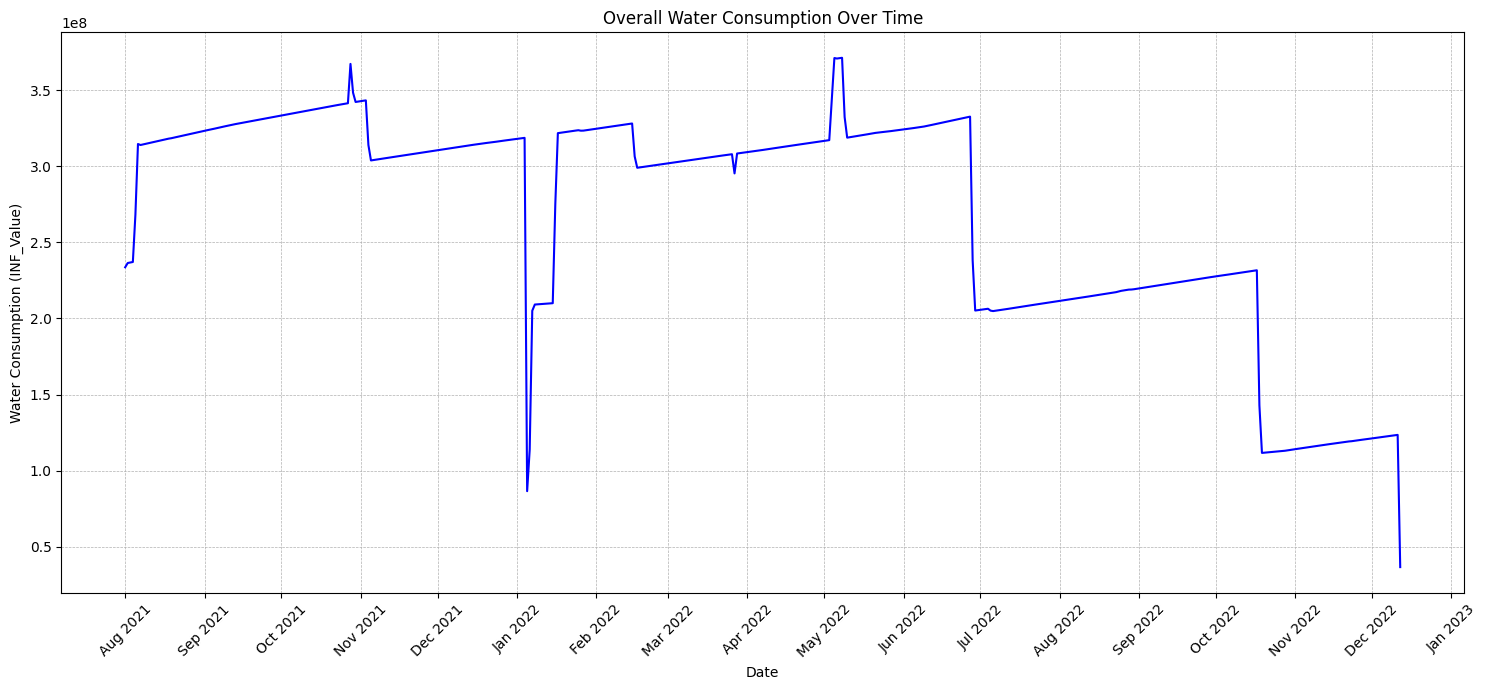

In [7]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Convert the RowKey column to datetime format
caudales_df['RowKey'] = pd.to_datetime(caudales_df['RowKey'])

# Plotting the overall water consumption over time
fig, ax = plt.subplots(figsize=(15, 7))

# Group by date and sum the INF_Value for each day
daily_consumption = caudales_df.groupby(caudales_df['RowKey'].dt.date)['INF_Value'].sum()

daily_consumption.plot(ax=ax, color='blue')
ax.set_title('Overall Water Consumption Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Water Consumption (INF_Value)')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


The plot showcases the overall water consumption in the city of Villarubia from August 2021 to December 2022. Here are some observations:

* Trend: There's a noticeable fluctuation in water consumption. We can see certain peaks and troughs, suggesting potential seasonality or specific events leading to increased consumption.
* Seasonality: There might be some periodic patterns, but without more contextual information, it's challenging to determine the exact causes.
* Anomalies: There are some days with particularly high consumption. Further investigation might be needed to understand these spikes.

In [17]:
canonical_consumption=caudales_df.groupby('Canonical')['INF_Value'].sum().sort_values(ascending=False)
canonical_consumption

Canonical
TOTALIZADOR                1.349042e+11
DEPOSITO_CAUDAL_SALIDA     3.109197e+07
DEPOSITO_VOLUMEN_SALIDA    7.767642e+06
CAUDAL                     5.822999e+06
DEPOSITO                   3.896637e+06
VOLUMEN_DIARIO             2.645391e+06
PRESION_ENTRADA_SECTOR     4.644602e+05
PRESION_SALIDA_SECTOR      1.812789e+05
DEPOSITO_METROS            1.489760e+05
VOLUMEN                    4.739165e+04
MARCHA_POZO                4.103000e+03
Name: INF_Value, dtype: float64

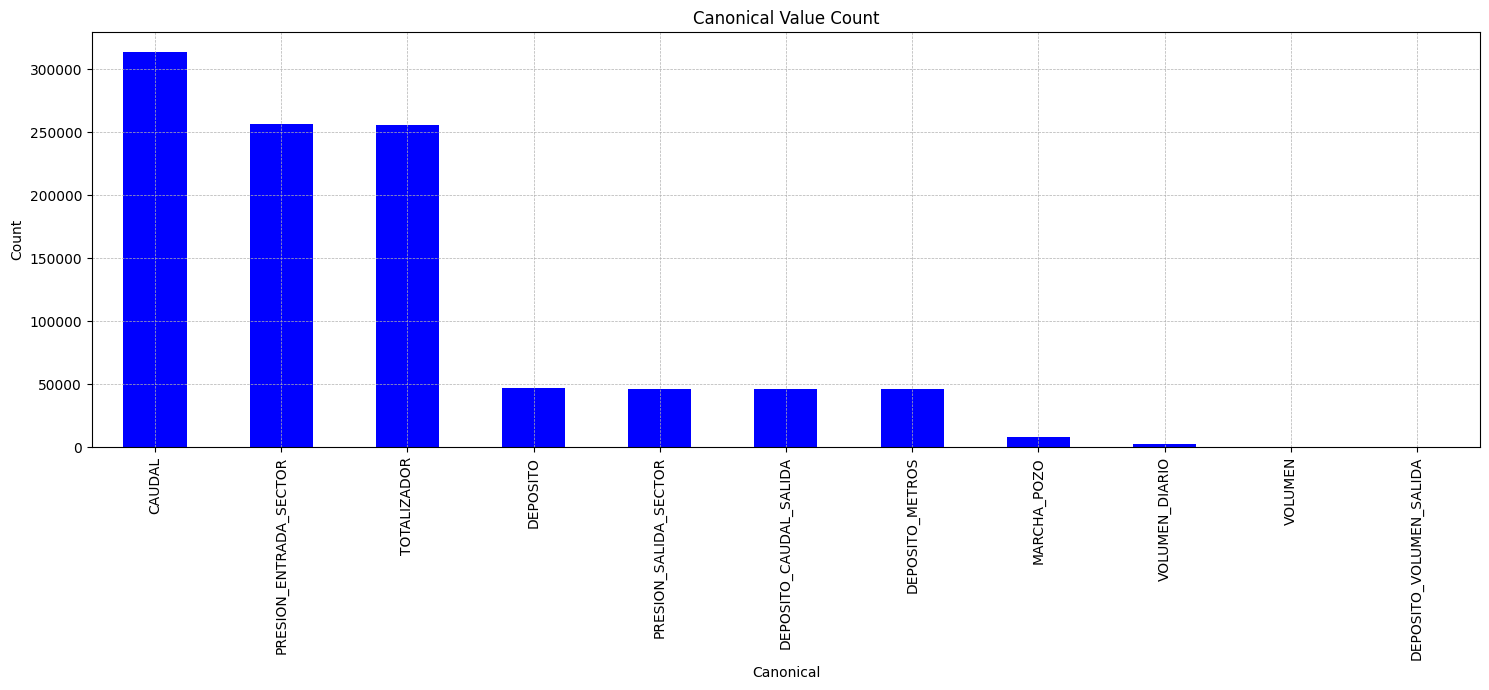

In [16]:
Canonical_value_count = caudales_df['Canonical'].value_counts()
# bar graph
fig, ax = plt.subplots(figsize=(15, 7))
Canonical_value_count.plot(kind='bar', ax=ax, color='blue')
ax.set_title('Canonical Value Count')
ax.set_xlabel('Canonical')
ax.set_ylabel('Count')
plt.xticks(rotation=90)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

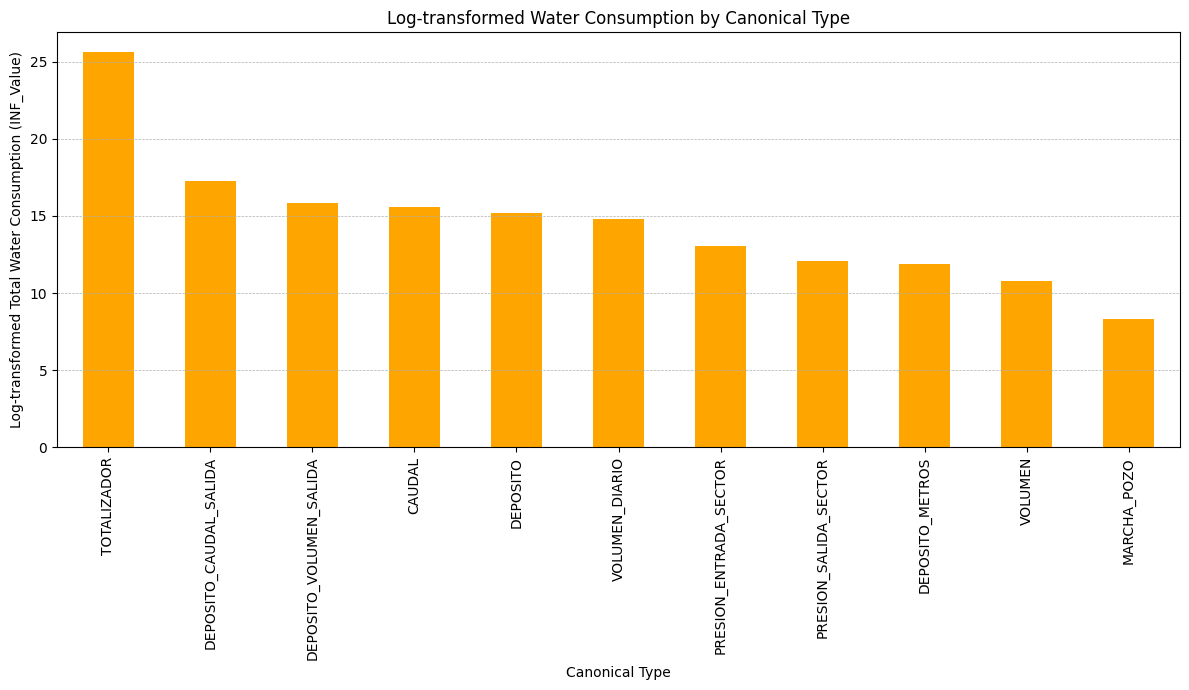

In [13]:
import numpy as np

# Apply log transformation to the canonical_consumption values
log_canonical_consumption = np.log1p(canonical_consumption)  # Adding 1 to avoid log(0)

# Plotting the log-transformed water consumption by Canonical
fig, ax = plt.subplots(figsize=(12, 7))
log_canonical_consumption.plot(kind='bar', ax=ax, color='orange')
ax.set_title('Log-transformed Water Consumption by Canonical Type')
ax.set_xlabel('Canonical Type')
ax.set_ylabel('Log-transformed Total Water Consumption (INF_Value)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



The total water consumption or measurements for each `Canonical` category. 

1. **TOTALIZADOR (\(1.349 \times 10^{11}\))**:
   - This category has an immensely high value, several orders of magnitude larger than the others. The name "TOTALIZADOR" suggests it might represent a cumulative or totalizing metric, possibly the overall water volume or consumption accumulated over a long period or across multiple sectors. Given its magnitude, it's crucial for tracking the entire city's water usage or flow.

2. **DEPOSITO_CAUDAL_SALIDA (\(3.109 \times 10^{7}\))**:
   - This category seems to be related to the water flow or volume exiting a deposit. The value is significantly lower than TOTALIZADOR but still quite high, indicating substantial water flow from the deposits.

3. **DEPOSITO_VOLUMEN_SALIDA (\(7.768 \times 10^{6}\))**:
   - This might represent the volume of water exiting the deposit. The value suggests a considerable amount of water is being drawn from the deposits.

4. **CAUDAL (\(5.823 \times 10^{6}\))**:
   - "Caudal" typically refers to the flow rate of water. This value suggests that there's a significant flow rate, which could be spread across various points or sectors in the city.

5. **DEPOSITO (\(3.897 \times 10^{6}\))**:
   - This category might represent the volume or level of water in the deposits. The value indicates a sizable amount of water is stored.

6. **VOLUMEN_DIARIO (\(2.645 \times 10^{6}\))**:
   - As the name suggests, this might represent the daily volume of water. The value indicates substantial daily water usage or flow.

7. **PRESION_ENTRADA_SECTOR (\(4.645 \times 10^{5}\))** and **PRESION_SALIDA_SECTOR (\(1.813 \times 10^{5}\))**:
   - These categories likely represent the water pressure at the entry and exit points of a sector, respectively. The values might indicate the force or pressure of water flow, crucial for ensuring efficient water distribution without causing pipe bursts or leaks.

8. **DEPOSITO_METROS (\(1.490 \times 10^{5}\))**:
   - This seems to represent the water level in deposits, measured in meters. The value suggests that the water level in deposits is significant.

9. **VOLUMEN (\(4.739 \times 10^{4}\))**:
   - Represents another volume metric, but the context isn't clear without additional information. The value indicates a smaller volume compared to other volume-related metrics.

10. **MARCHA_POZO (\(4.103 \times 10^{3}\))**:
   - The smallest value among the categories. "Marcha Pozo" might relate to the operation or status of wells ("pozos"). This could be a count of operational wells or a similar metric.

In summary, the values provide insights into water consumption, flow, storage, and distribution in Villarubia. The dominant metrics, like TOTALIZADOR, give an overview, while others offer granular details about specific aspects of the water system. Properly managing and monitoring these metrics is crucial for sustainable water management in the city.

# caudal has more value count but deposito_caudal_salida has more inf value #

This observation is intriguing and offers insight into the nature and usage patterns of the water system in Villarubia.

Let's break down the observation:

1. **High Value Count for CAUDAL**: A high count for `CAUDAL` means that there were many measurements recorded for this category. This could imply frequent monitoring, suggesting that the flow rate is measured often, perhaps even continuously.

2. **High INF_Value for DEPOSITO_CAUDAL_SALIDA**: Despite having fewer recorded measurements compared to `CAUDAL`, `DEPOSITO_CAUDAL_SALIDA` has a higher cumulative `INF_Value`. This indicates that when measurements were taken for this category, the values were typically high. Given the name "DEPOSITO_CAUDAL_SALIDA" (which seems to suggest the flow or volume of water exiting a deposit), it might represent large releases or withdrawals from a deposit.

From these observations, several inferences can be made:

1. **Frequency vs. Magnitude**: While `CAUDAL` is measured frequently, its individual measurements might be relatively lower in magnitude. In contrast, `DEPOSITO_CAUDAL_SALIDA` might be measured less often, but when it is, it captures significant water flow events, like emptying or large withdrawals from a deposit.

2. **Operational Insights**: The high values for `DEPOSITO_CAUDAL_SALIDA` could indicate operational activities like scheduled releases from a reservoir or deposit to supply water to the city. These releases might be less frequent but in large volumes.

3. **Monitoring Priorities**: The frequent measurements for `CAUDAL` suggest that it might be critical to continuously monitor the flow rate in certain parts of the water system, perhaps to prevent overflows, manage distribution, or ensure consistent supply.

4. **Water Management Strategy**: Regular, significant releases from deposits (as indicated by `DEPOSITO_CAUDAL_SALIDA`) might be part of a water management strategy to ensure steady water supply, especially during peak demand times or when other sources are low.

In summary, the data suggests a dynamic water management system in Villarubia, where frequent flow rate monitoring is combined with significant, perhaps scheduled, releases from deposits to manage the city's water needs effectively.

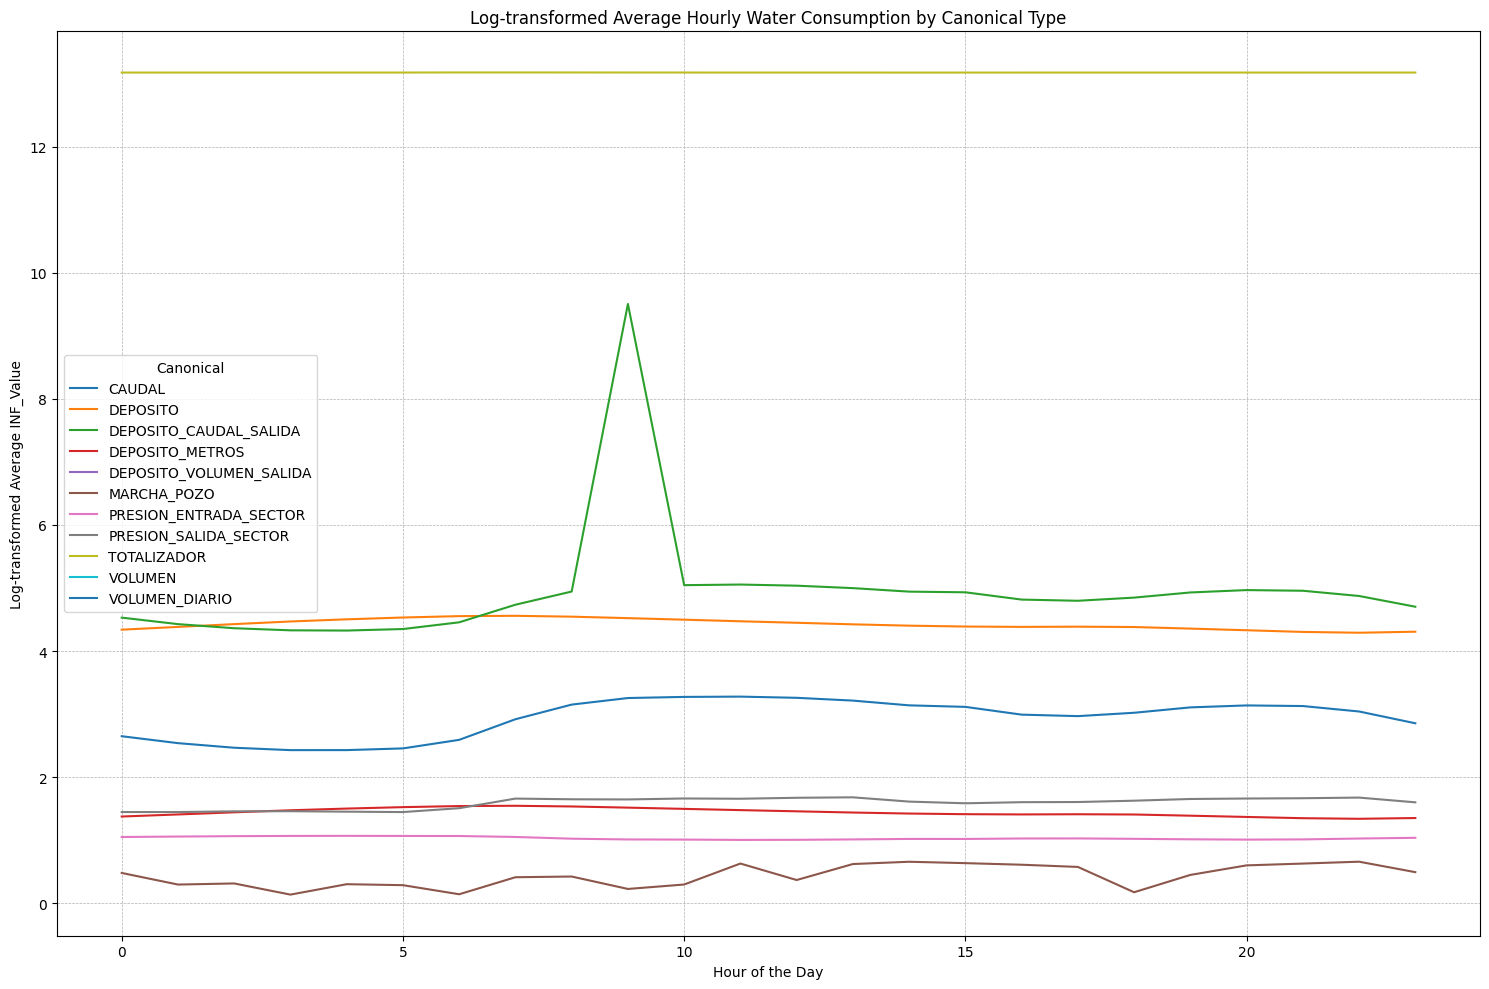

In [18]:
# Extract hour from the RowKey column
caudales_df['Hour'] = caudales_df['RowKey'].dt.hour

# Group by hour and Canonical, then average the INF_Value
hourly_average = caudales_df.groupby(['Hour', 'Canonical'])['INF_Value'].mean().unstack()


# Apply log transformation to the hourly average values
log_hourly_average = np.log1p(hourly_average)

# Plotting the log-transformed hourly average for each Canonical type
fig, ax = plt.subplots(figsize=(15, 10))
log_hourly_average.plot(ax=ax)
ax.set_title('Log-transformed Average Hourly Water Consumption by Canonical Type')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Log-transformed Average INF_Value')
ax.legend(title='Canonical')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


The log-transformed plot offers a clearer view of the average hourly water consumption for each Canonical type:

Distinguishing Patterns: With the log transformation, we can better distinguish the patterns of each Canonical type.

TOTALIZADOR & DEPOSITO: Both these categories remain relatively stable throughout the day, with slight fluctuations.

CAUDAL: The fluctuations in CAUDAL are now more visible, especially during the early hours and afternoon.

DEPOSITO_CAUDAL_SALIDA & DEPOSITO_VOLUMEN_SALIDA: These categories also display clear variations, particularly in the early hours.

Other Types: Canonical types like PRESION_ENTRADA_SECTOR and PRESION_SALIDA_SECTOR maintain a consistent pattern throughout the day, though the log transformation makes their minor changes more noticeable

C:\Users\lalit\AppData\Local\Temp\ipykernel_15820\541865534.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  caudales_df['Month-Year'] = caudales_df['RowKey'].dt.to_period('M')


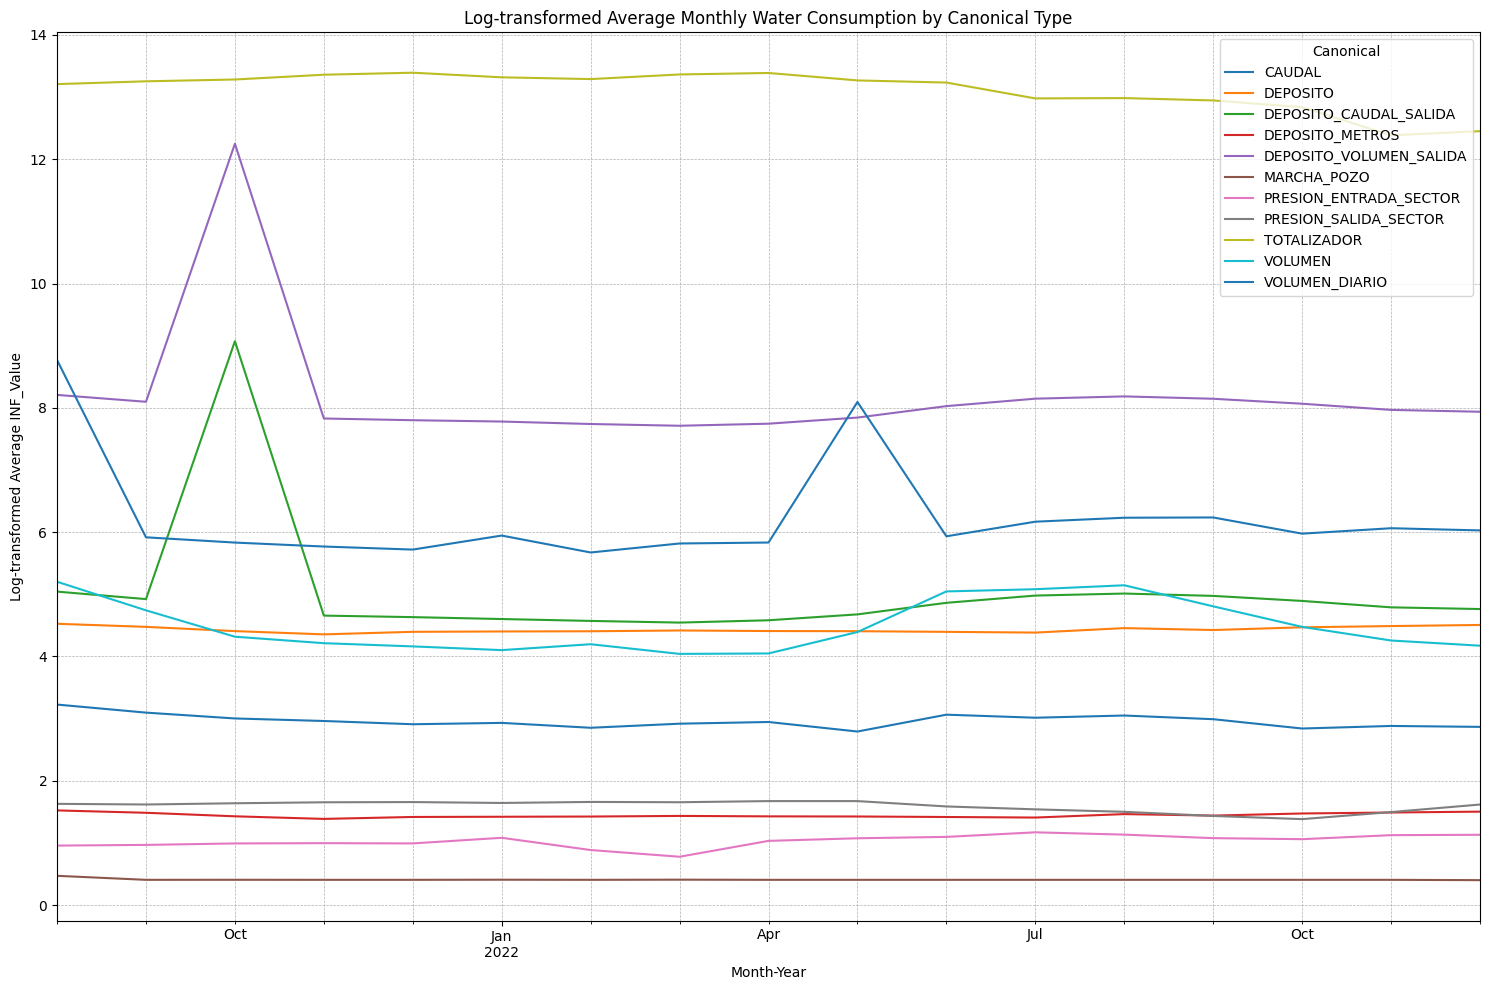

In [19]:
# Extract month from the RowKey column
caudales_df['Month-Year'] = caudales_df['RowKey'].dt.to_period('M')

# Group by month and Canonical, then average the INF_Value
monthly_average = caudales_df.groupby(['Month-Year', 'Canonical'])['INF_Value'].mean().unstack()

# Apply log transformation to the monthly average values for clearer visualization
log_monthly_average = np.log1p(monthly_average)

# Plotting the log-transformed monthly average for each Canonical type
fig, ax = plt.subplots(figsize=(15, 10))
log_monthly_average.plot(ax=ax)
ax.set_title('Log-transformed Average Monthly Water Consumption by Canonical Type')
ax.set_xlabel('Month-Year')
ax.set_ylabel('Log-transformed Average INF_Value')
ax.legend(title='Canonical')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


The plot depicts the log-transformed average monthly water consumption for each Canonical type over the time span of the dataset:

Overall Trend: The general trend for most Canonical types appears to be relatively stable across months, with some noticeable fluctuations.

Seasonal Patterns: Some types, like CAUDAL, show potential seasonal patterns with peaks and troughs. For instance, there's a peak around the middle of the time period and a dip towards the end.

Stable Categories: Canonical types like TOTALIZADOR and DEPOSITO remain consistent over the months, indicating steady measurements without significant changes.

Fluctuating Categories: DEPOSITO_CAUDAL_SALIDA and DEPOSITO_VOLUMEN_SALIDA show some variability across months, suggesting changes in water flow or volume exiting the deposits.

Data Range: It's evident that the dataset spans from August 2021 to December 2022, providing a comprehensive view of the water consumption patterns over this period.

By analyzing these monthly patterns, water management authorities can anticipate seasonal changes, plan resources accordingly, and ensure consistent water supply and storage.

# Analysis that can be done #

Given the dataset and its context related to water consumption in the city of Villarubia, several other aspects can be explored for a comprehensive analysis:

1. **Anomaly Detection**:
   - Identify unusual spikes or drops in the `INF_Value` for any `Canonical` type, which could indicate leaks, malfunctions, or special events.
  
2. **Correlation Analysis**:
   - Examine if there's a correlation between different `Canonical` types. For instance, does a rise in `CAUDAL` correlate with a change in `DEPOSITO_CAUDAL_SALIDA`?

3. **Sector-wise Analysis**:
   - Dive deeper into the `Sector_Neta` column to determine how water consumption varies across different sectors of the city. This can reveal high consumption zones or areas that need infrastructure upgrades.

4. **Day of the Week Patterns**:
   - Analyze if there are specific days of the week with higher or lower water consumption, which can help in planning supply and demand management.

5. **Comparison with External Data**:
   - If external data like weather patterns, city events, or population movement is available, it can be correlated with the water consumption data to understand external influences.

6. **Duration Analysis**:
   - Investigate the duration for which deposits remain at high or low levels. This can help in planning replenishments and ensuring water availability.

7. **Statistical Analysis**:
   - Apply statistical tests to determine if observed patterns are statistically significant or just random fluctuations.

8. **Distribution Analysis**:
   - Examine the distribution of `INF_Value` for each `Canonical` type to understand the typical range of values and any outliers.

9. **Trend Decomposition**:
   - Decompose the time series data to extract trends, seasonality, and residuals. This can help in understanding long-term patterns, periodic fluctuations, and irregularities.

10. **Predictive Modeling**:
   - Use historical data to build predictive models that can forecast future water consumption patterns, helping in proactive planning.

11. **Granular Time Analysis**:
   - Instead of daily or monthly patterns, we can also delve into more granular time intervals like hourly or weekly patterns for a detailed analysis.

Choosing the aspects to explore further depends on the specific objectives and questions that need to be answered. Let me know which aspects you'd like to delve deeper into, or if you have other specific queries in mind!